In [1]:
## Styling to center the figures
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# <center>TD de morpho-math : graphes réguliers et connectivité</center>

Ce TD parle des motions de connectivité sur graphe régulier.

## 1- Connectivité et graphes

Un graphe est un couple $(E,\Gamma)$ où $E$ est un ensemble fini de points, appellés *sommets* et $\Gamma$ une application de $E$ vers ${\cal P}(E)$, la collection des sous-parties de $E$, appellés *arcs*.

### 1.1 Début: les environnements nécessaires

In [2]:
## pour avoir des figures "en ligne"
%matplotlib inline

In [17]:
## le minimum syndical
import matplotlib.pylab as plt
import numpy as np

### 1.2 Ici on va construire progressivement une structure de graphe régulier

D'abord on commence par construire une manière d'afficher sommets et arêtes

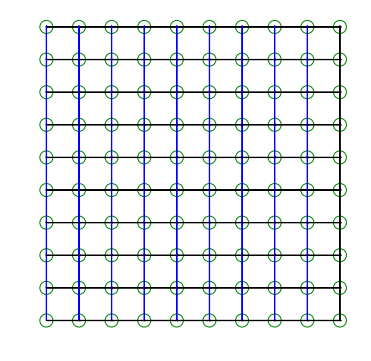

In [4]:
## une figure
plt.figure(figsize=(6,6))
ax=plt.subplot(aspect='equal')
plt.axis('off')

def pdot(x,y,col,full=False):
    if full:
        plt.gcf().gca().add_artist(plt.Circle((x,y),.02,ec=col,color=col))
    else:
        plt.gcf().gca().add_artist(plt.Circle((x,y),.02,ec=col,color='white'))
        
X=np.arange(0.05,1,step=0.1) ## on ne commence pas à zéro 
Y=X

## tracer les sommets
for x in X:
    for y in Y:
        pdot(x,y,col='green',full=False)
        
        
## draw edges
for x in X[0:-1]:
    plt.arrow(x,Y[-1],0.1,0,fc='k',ec='k')
    plt.arrow(X[-1],x,0,0.1,fc='k',ec='k')
    for y in Y[0:-1]:
        plt.arrow(x, y, 0, 0.1, fc='b', ec='b');
        plt.arrow(x, y, 0.1, 0, fc='k', ec='k')
           
plt.show()

### 1.3 Une structure de graphe régulier

Ici on utilise un graphe construit de toute pièces à la main.


In [11]:
W = 11 ## width = largeur
H = 7 ## height = hauteur

## pour que le graphe entier puisse tenir sur la figure
wh = max(W,H)

nodes=[] ## structure de sommets: une liste

## les sommets du graphe (nodes en anglais)
for y in range(0,H):
    for x in range(0,W):
        ## un sommet = 2 coordonnées + une valeur 
        nodes.append([float(2*x+1)/(2*wh),
                      float(2*y+1)/(2*wh),0]) 


edges = [] ## structure d'arêtes

for y in range(0,H-1):
    for x in range(0,W-1):
        i = y * W + x
        edges.append([i,i+1,0]) # toutes les arêtes sont valuées à zéro 
        edges.append([i,i+W,0]) # pour le moment
# arêtes de la fin
for x in range(0,W-1):
    i = (H-1)*W + x
    edges.append([i,i+1,0])
for y in range(0,H-1):
    i = y * W + (W-1)
    edges.append([i,i+W,0])
        
def plotNodes(mynodes):
    for n in mynodes:
        x = n[0] ; y = n[1]
        pdot(x,y,col='green',full=n[2])
        
def plotEdges(mynodes, myedges):
    for e in myedges:
        n1 = mynodes[e[0]] # premier point
        n2 = mynodes[e[1]] # deuxième point
        x1 = n1[0] ; x2 = n2[0] ## coordonnées en abcisse
        y1 = n1[1] ; y2 = n2[1] ## coordonnées en ordonnées
        plt.arrow(x1,y1,(x2-x1),(y2-y1),fc='k',ec='k') 

def xyToIndex(x,y):
    global W ## pas strictement nécessaire
    return(int(y)*W+int(x)) 
        


### 1.4 Utilisation de la structure de graphe

Sommets et arêtes sont créés à la main. On peut spécifier un sous-ensemble $X \subseteq E$ en utilisant le champs des valeurs. Les sommets à 1 appartiennent à $X$ et les sommets à 0 à $E \backslash X$. Les sommets de $E$ apparaissent pleins (full) tandis que ceux de $E \backslash X$ sont "vides". 

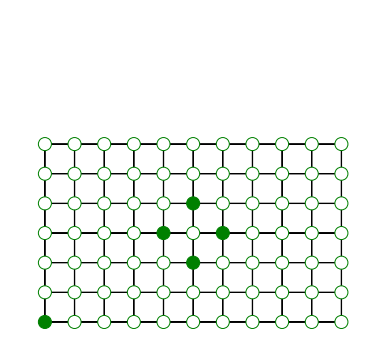

In [10]:
nodes[0][2]=1

#nodes[xyToIndex(W/2,H/2)][2] = 1

nodes[xyToIndex(W/2+1,H/2)][2] = 1
nodes[xyToIndex(W/2-1,H/2)][2] = 1
nodes[xyToIndex(W/2,H/2+1)][2] = 1  
nodes[xyToIndex(W/2,H/2-1)][2] = 1 
    
## une figure
plt.figure(figsize=(6,6))
ax=plt.subplot(aspect='equal')
plt.axis('off')

plotEdges(nodes,edges)
plotNodes(nodes)


## 2. Une classe de graphes

Créer un graphe à la main n'est pas pratique. On propose une classe de graphe, ce qui permet de l'utiliser plus facilement.

In [13]:
from copy import deepcopy

## a graph class
class Graph(object):
    """A simple graph structure"""    
    def __init__(self,edges,nodes,W,H):
        self.edges = deepcopy(edges)
        self.nodes = deepcopy(nodes)
        self.W = W
        self.H = H
        self.Size = 1/max(W,H) ## size of a square pixel
        self.Epsilon = 0.05*self.Size
        self.Delta = 0.5*self.Size ## to center circles
        pass

    # return only a shallow copy (pointer) to the edges
    def get_edges(self):
        return(self.edges)

    # shallow copy to the nodes
    def get_nodes(self):
        return(self.nodes)

    def get_W(self):
        return(self.W)
    
    def get_H(self):
        return(self.H)
    
    def get_dims(self):
        return(self.W,self.H)
    
    def xyToIndex(self,x,y):
        return(y*self.W+x)
    
    def pdot(self,x,y,col,full=False):
        if full:
            plt.gcf().gca().add_artist(plt.Circle((x,y),0.5*self.Delta,ec=col,color=col))
        else:
            plt.gcf().gca().add_artist(plt.Circle((x,y),0.5*self.Delta,ec=col,color='white'))
    
    def psquare(self,x,y,col,full=False):
        if full:
            plt.gcf().gca().add_artist(plt.Rectangle((x,y),self.Size,self.Size,ec=col,color=col))
        else:
            plt.gcf().gca().add_artist(plt.Rectangle((x,y),self.Size,self.Size,ec=col,color='white'))
    
    def plotNodes(self):
        for n in self.nodes:
            x = n[0] ; y = n[1]
            ## le +0.5*self.Size) est purement cosmetique
            self.pdot(x+self.Delta,y+self.Delta,col='green',full=n[2])
            
    def plotSquares(self,neg=False,bin=False):
        if (bin):
            for n in self.nodes:
                if (neg):
                    if (n[2]>0):
                        x = n[0] ; y = n[1]+self.Epsilon
                        self.psquare(x,y,col='black',full=True)
                else:
                    if (n[2]==0):
                        x = n[0] ; y = n[1]+self.Epsilon
                        self.psquare(x,y,col='black',full=True)
        else:
            for n in self.nodes:
                x = n[0] ; y = n[1]+self.Epsilon
                self.psquare(x,y,col='green',full=n[2])
             
    def plotEdges(self):
        for e in self.edges:
            n1 = self.nodes[e[0]]
            n2 = self.nodes[e[1]]
            x1 = n1[0]+self.Delta ; x2 = n2[0]+self.Delta
            y1 = n1[1]+self.Delta ; y2 = n2[1]+self.Delta
            plt.arrow(x1,y1,(x2-x1),(y2-y1),fc='k',ec='k')
    
    # display with edges
    def display(self):
        plt.figure(figsize=(8,8))
        ax=plt.subplot(aspect='equal')
        plt.axis('off')
        plt.gcf().gca().invert_yaxis() ## to plot in the usual way for images
        self.plotEdges()
        self.plotNodes()
        
    # display as pixels
    def pixels(self):
        plt.figure(figsize=(8,8))
        ax=plt.subplot(aspect='equal')
        plt.axis('off')
        plt.gcf().gca().invert_yaxis() ## to plot in the usual way for images
        self.plotSquares()
        plt.show()    
        
    ## exporte un buffer numpy
    def image(self, dtype=np.uint8):
        a = np.zeros(self.W*self.H,dtype=dtype)
        i=0
        for n in self.nodes:
            a[i] = n[2]
            i+=1
        return(a.reshape(self.H,self.W))
    
    ## plot avec numpy
    def show(self,inv=False):
        plt.figure(figsize=(8,8))
        ax=plt.subplot(aspect='equal')
        plt.axis('off')
        if (inv):
            plt.imshow(self.image(),cmap="gray_r")
        else:
            plt.imshow(self.image(),cmap="gray")
        plt.show()

### 2.1 Utilisation de la classe de graphe

On peut initialiser la classe de graphe à partir d'une liste de sommets et d'arêtes, puis on peut appliquer un opérateur sur ces graphes. Pour la suite, on a mis cette classe (et d'autres fonctions utiles) dans un module.

In [2]:
## pour utiliser la classe de graphe dans des scripts ultérieurs
from morphograph import Graph

### 2.2 Initialiser un graphe vide

On peut créer un graphe vide -- mais connecté, puis le remplir à la main. La méthode ${\tt .pixel()}$ permet d'afficher comme une image, sans afficher les arêtes.

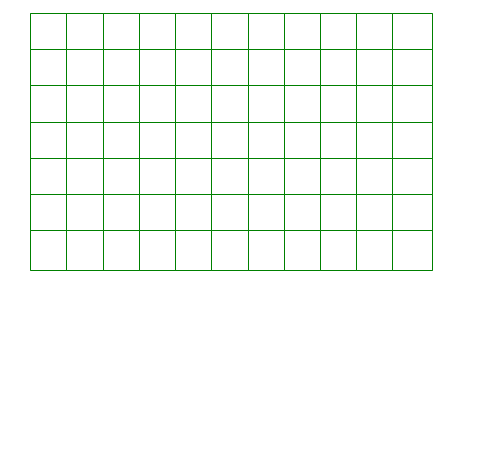

In [3]:
W = 11 ## width = largeur
H = 7 ## height = hauteur

def createEmptyGraph(W,H):
    '''
    Creation d'un graphe rectangulaire vide
    '''
    ## pour que le graphe entier puisse tenir sur la figure
    wh = max(W,H)+1 # the +1 is so the entire figure is visible up to the edges

    nodes=[] ## structure de sommets: une liste

    ## les sommets du graphe (nodes en anglais)
    ## on va faire apparaître les pixel avec des carrés, donc
    ## inutile de rajouter le facteur 1/(2wh) à chaque coordonnée.
    for y in range(0,H):
        for x in range(0,W):
            ## un sommet = 2 coordonnées + une valeur 
            nodes.append([float(x)/(wh),
                        float(y)/(wh),0]) 
            
    edges = [] ## structure d'arêtes

    for y in range(0,H-1):
        for x in range(0,W-1):
            i = y * W + x
            edges.append([i,i+1,0]) # toutes les arêtes sont valuées à zéro 
            edges.append([i,i+W,0]) # pour le moment
    # arêtes de la fin
    for x in range(0,W-1):
        i = (H-1)*W + x
        edges.append([i,i+1,0])
    for y in range(0,H-1):
        i = y * W + (W-1)
        edges.append([i,i+W,0])
    
    return(edges,nodes)
   
## Init
(edges,nodes)= createEmptyGraph(W,H)
G = Graph(edges,nodes,W,H)
G.pixels()

### 2.3 Lire un graphe à partir d'un fichier.
Ça n'est pas très pratique de remplir un graphe pixel par pixel. On proposer un format d'image facile à composer dans un éditeur de texte.

In [5]:
import csv
def read_graph(file,verbose=False):
    '''
    Read a graph from a file
    '''
    f = open(file)
    result = csv.reader(f,delimiter=' ')
    i = 0
    k = 0
    try:
        for row in result:
            if (verbose):
                print(row)
            if (i==0): ## first row
                dimX=int(row[0])
                dimY=int(row[1])
                print("Graphe de dimension (%d x %d)" % (dimX,dimY))
                edges,nodes=createEmptyGraph(dimX,dimY)
                i = 1
            else:
                for element in row:
                    nodes[k][2] = int(element)
                    k = k+1
    except:
        print("*** Exception: k=%d" % k)
    return(Graph(edges,nodes,dimX,dimY))

In [6]:
## un graphe de démo
G = read_graph("images/mongraphe.txt", True)

['5', '5']
Graphe de dimension (5 x 5)
['1', '0', '1', '0', '0']
['0', '1', '1', '0', '0']
['0', '1', '1', '0', '0']
['1', '0', '0', '1', '0']
['0', '1', '1', '1', '1']


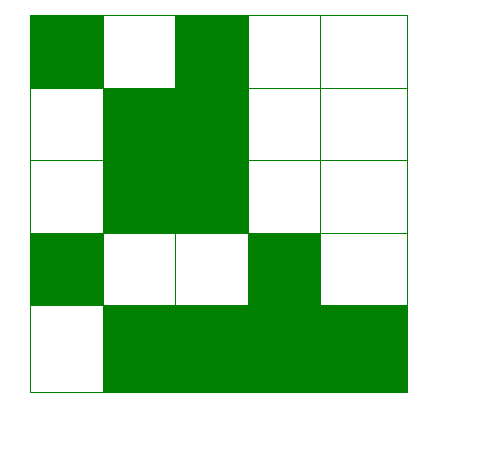

In [7]:
G.pixels()

In [8]:
## un graphe un peu plus grand
Q=read_graph("images/question.txt",True)

['11', '7']
Graphe de dimension (11 x 7)
['1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
['0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0']
['0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0']
['0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0']
['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']


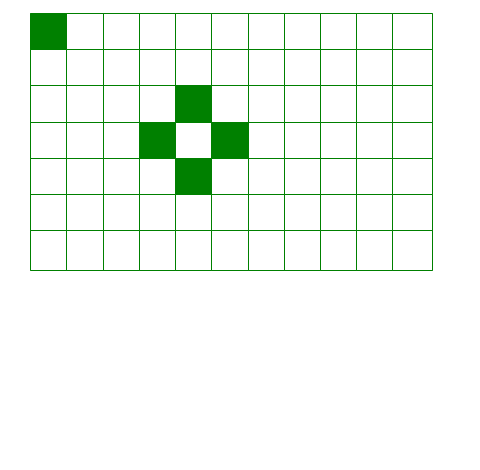

In [9]:
Q.pixels()

In [11]:
## un graphe dont on se servira pour illustrer les opérations classiques
Bands=read_graph("images/bands.txt", True)

['11', '11']
Graphe de dimension (11 x 11)
['0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0']
['0', '1', '1', '1', '0', '0', '1', '0', '0', '0', '0']
['1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1']
['1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '1']
['1', '0', '0', '1', '0', '0', '0', '1', '1', '1', '0']
['0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0']
['0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0']
['0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0']
['0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0']
['0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0']
['0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0']


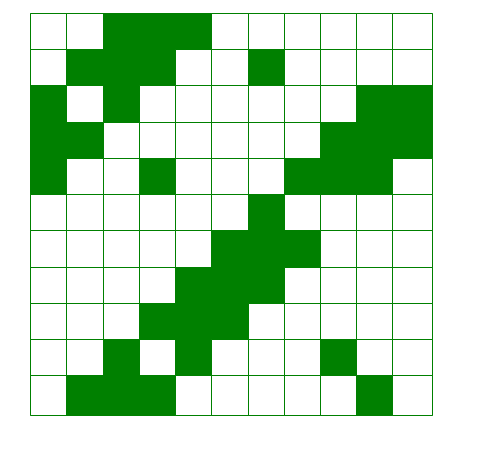

In [12]:
Bands.pixels()

In [13]:
## enfin un graphe qui commence à ressembler à une vraie image
FP=read_graph("images/FP.txt")

Graphe de dimension (128 x 95)


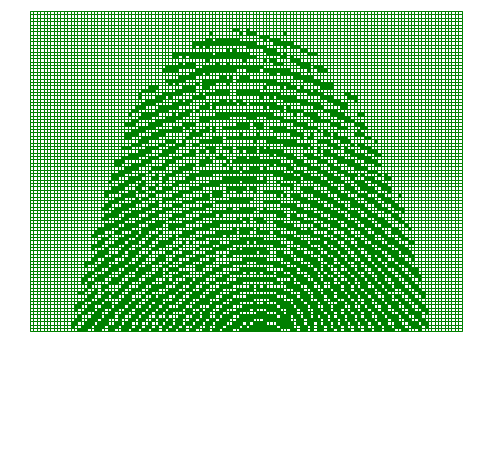

In [14]:
FP.pixels()

### 2.4 Afficher avec Numpy/plot
L'affichage avec ".pixel()" n'est pas efficace pour les grandes images. On peut à la place utiliser l'affichage d'images existant dans matplotlib, à condition de convertir le graphe en tableau numpy d'abord. La classe de graphe permet de faire ça facilement.

D'abord avec la méthode ".show()" qui est simple d'emploi.

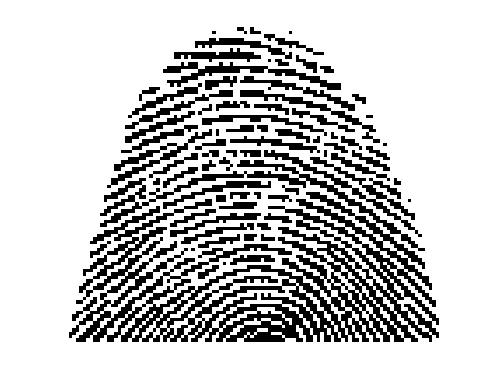

In [15]:
FP.show(inv=True)

ensuite avec la méthode ".image()" qui transforme le graphe en image... On peut comme ça afficher plusieurs images dans une même figure avec matplotlib.

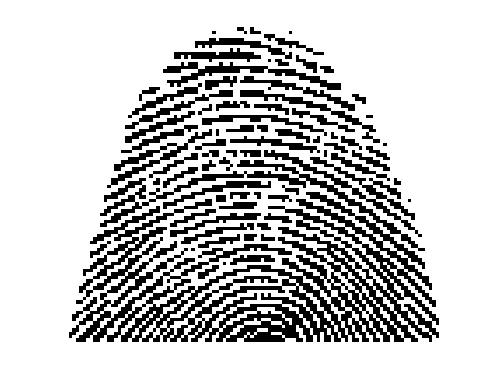

In [18]:
a = FP.image()
a.shape
plt.figure(figsize=(8,8))
ax=plt.subplot(aspect='equal')
plt.axis('off')
plt.imshow(a,cmap='gray_r') #  affiche en ndg inversés

## 3 - Operations sur graphes
### 3.1 Dilatation

In [ ]:
## Dilation by considering the adjacency graph
def dilate(g1):
    ## input edges (deep copied)
    myedges = g1.get_edges()
    mynodes_in = g1.get_nodes()
    dims = g1.get_dims()
    ## output edges
    mynodes_out = deepcopy(mynodes_in)
    ## not elegant
    for n in myedges:
        v1 = mynodes_in[n[0]][2] # value
        v2 = mynodes_in[n[1]][2]
        maxv = max(v1,v2)
        ## change la valeur de la sortie si elle est plus grande
        mynodes_out[n[0]][2] = max(maxv, mynodes_out[n[0]][2])
        mynodes_out[n[1]][2] = max(maxv, mynodes_out[n[1]][2])
    ## 
    return(Graph(myedges,mynodes_out,dims[0],dims[1]))

In [ ]:
Bdil=dilate(Bands)

In [ ]:
Bands.pixels()

In [ ]:
Bdil.pixels()

In [ ]:
FPdil = dilate(FP)

In [ ]:
FPdil.show(inv=True)

In [ ]:
## Erosion by considering the adjacency graph
def erode(g1):
    ## input edges (deep copied)
    myedges = g1.get_edges()
    mynodes_in = g1.get_nodes()
    dims = g1.get_dims()
    ## output edges
    mynodes_out = deepcopy(mynodes_in)
    ## not elegant
    for n in myedges:
        v1 = mynodes_in[n[0]][2] # value
        v2 = mynodes_in[n[1]][2]
        minv = min(v1,v2)
        mynodes_out[n[0]][2] = min(minv,mynodes_out[n[0]][2])
        mynodes_out[n[1]][2] = min(minv,mynodes_out[n[1]][2])
    ## 
    return(Graph(myedges,mynodes_out,dims[0],dims[1]))

In [ ]:
FPero = erode(FP)

In [ ]:
FPero.show(inv=True)

### Changer l'adjacence change les opérateurs

## On vérifie la qualité des adjacences

In [ ]:
def changeAdjacency(graph,type='4'):
    '''
    Change l'adjacence d'un graphe
    '''
    nodes=graph.get_nodes() ## récupère les sommets
    W = graph.get_W()
    H = graph.get_H()
            
    edges = [] ## structure d'arêtes
    
    ## "4-connectivité"
    if (type == '4'):
        for y in range(0,H-1):
            for x in range(0,W-1):
                i = y * W + x
                edges.append([i,i+1,0]) # toutes les arêtes sont valuées à zéro 
                edges.append([i,i+W,0]) # pour le moment
        # arêtes de la fin
        for x in range(0,W-1):
            i = (H-1)*W + x
            edges.append([i,i+1,0])
        for y in range(0,H-1):
            i = y * W + (W-1)
            edges.append([i,i+W,0])
    
    ## "8-connectivité"
    if (type == '8'):
        """
        A vous de bosser !
        """
        pass
    
    if (type == 'H'): ## horizontal adjacence
        for y in range(0,H-1):
            for x in range(0,W-1):
                i = y * W + x
                edges.append([i,i+1,0]) # arètes horizontales seulement
        # arêtes horizontales de la fin
        for x in range(0,W-1):
            i = (H-1)*W + x
            edges.append([i,i+1,0])

    if (type == 'V'): ## vertical adjacence
        for y in range(0,H-1):
            for x in range(0,W-1):
                i = y * W + x
                edges.append([i,i+W,0]) # arêtes verticales seulement
        # arêtes verticales de la fin
        for y in range(0,H-1):
            i = y * W + (W-1)
            edges.append([i,i+W,0])
            
            
    ### Definissez aussi les deux diagonales comme deux adjacences séparées.
    
    return(Graph(edges,nodes,W,H))

In [ ]:
Bands=read_graph("bands.txt")
Bands.display()
BandsH = changeAdjacency(Bands,"H")
BandsH.display()
BandsV = changeAdjacency(Bands,"V")
BandsV.display()

In [ ]:
FPH = changeAdjacency(FP,"H")

In [ ]:
FPHdil=dilate(FPH)

In [ ]:
FPHdil.show(inv=True)

In [ ]:
FPHclo=erode(FPHdil)

In [ ]:
FPHclo.show(inv=True)

## Operateurs

On note $\delta_H(G)$ la dilatation horizontale du graphe $G$

On note $\varepsilon_H(G)$ l'érosion horizontale du graphe $G$

On node $\psi_H(G)=\varepsilon_H(\delta_H(G))$ la fermeture horizontale du graphe $G$

On note $\gamma_H(G)=\delta_H(\varepsilon_H(G))$ l'ouverture horizontale du graphe $G$

Calculez $\gamma_H(G)$...

In [ ]:
FPHero=erode(FPH)
FPHopen=dilate(FPHero)
FPHopen.show(inv=True)